# Logistic Regression

## 01. Import libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

plt.rc("font", size=14)
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

## 02. Load Data

In [2]:
# to have access to my drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
train_data = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/train.csv')
train_data.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Attalah, Miss. Malake",male,NaN,NaN,NaN,CA. 2343,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [4]:
test_data = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/test.csv')
test_data.describe(include = "all") 

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Spedden, Mr. Frederic Oakley",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


## 03. Missing Values

In [5]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### 03.01. Age

In [6]:
train_data['Age'].to_frame().describe()

,Age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


In [7]:
print('Percent of missing "Age" records is %.2f%%' %((train_data['Age'].isnull().sum()/train_data.shape[0])*100))

Percent of missing "Age" records is 19.87%


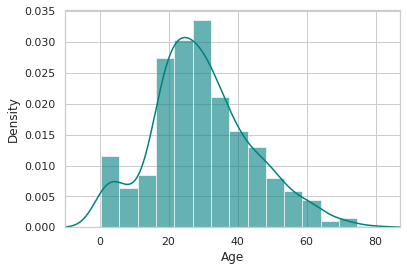

In [8]:
ax = train_data['Age'].hist(bins = 15,density = True,stacked = True, color = "teal",alpha = 0.6)
train_data['Age'].plot(kind = "density",color = "teal")
ax.set(xlabel="Age")
plt.xlim(-10,87)
plt.show()
#right skewed

Since the age data is right skewed, using the mean might give us biased results by filling in ages that are older that desired 

In [9]:
# mean age
print('The mean of "Age" is %.2f' %(train_data["Age"].mean(skipna=True)))
# median age
print('The median of "Age" is %.2f' %(train_data["Age"].median(skipna=True)))

The mean of "Age" is 29.70
The median of "Age" is 28.00


### 03.02. Cabin

In [10]:
print('Percent of missing "Cabin" records is %.2f%%' %((train_data['Cabin'].isnull().sum()/train_data.shape[0])*100))

Percent of missing "Cabin" records is 77.10%


Too many samples without "Cabin". Not a useful variable

### 03.03. Embarked

In [11]:
print('Percent of missing "Embarked" records is %.2f%%' %((train_data['Embarked'].isnull().sum()/train_data.shape[0])*100))


Percent of missing "Embarked" records is 0.22%


We can use the mode

In [12]:
print("Boarded passengers grouped by port of embarkation")
print(train_data['Embarked'].value_counts())

Boarded passengers grouped by port of embarkation
S    644
C    168
Q     77
Name: Embarked, dtype: int64


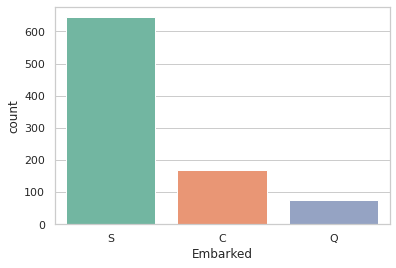

In [13]:
sns.countplot(x = "Embarked",data = train_data,palette="Set2")
plt.show()

In [14]:
print('The most common boarding port of embarkation is %s.' %train_data['Embarked'].value_counts().idxmax())

The most common boarding port of embarkation is S.


In [15]:
data_train_nomv = train_data.copy()
data_train_nomv["Age"].fillna(train_data['Age'].median(skipna=True),inplace = True)
data_train_nomv["Embarked"].fillna(train_data['Embarked'].value_counts().idxmax(),inplace = True)
data_train_nomv.drop("Cabin",axis = 1,inplace=True)

In [16]:
data_train_nomv.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

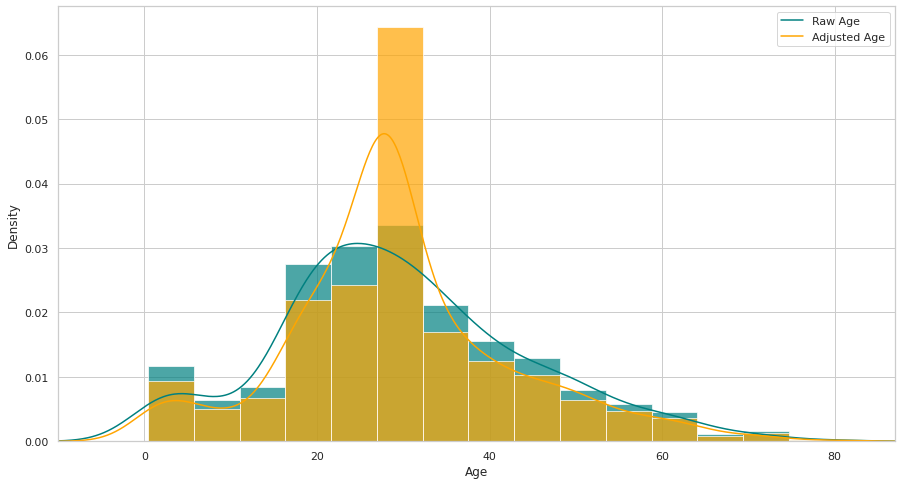

In [17]:
plt.figure(figsize=(15,8))
ax = train_data['Age'].hist(bins = 15,density = True,stacked = True,color = "teal",alpha = 0.7)
train_data['Age'].plot(kind = "density",color = "teal")
ax = data_train_nomv['Age'].hist(bins = 15,density = True,stacked = True,color = "orange",alpha = 0.7)
data_train_nomv['Age'].plot(kind = "density",color = "orange")
ax.legend(["Raw Age", "Adjusted Age"])
ax.set(xlabel="Age")
plt.xlim(-10,87)
plt.show()

## 04. Multicollinearity
 both SibSp and Parch relate to traveling with family.

In [18]:
data_train_nomv["TravelAlone"] = np.where((data_train_nomv["SibSp"] + data_train_nomv["Parch"])>0,0,1)

In [19]:
data_train_nomv.drop("SibSp",axis = 1,inplace=True)
data_train_nomv.drop("Parch",axis = 1,inplace=True)

In [20]:
data_train_nomv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   Ticket       891 non-null    object 
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
 9   TravelAlone  891 non-null    int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [21]:
data_train_nomv.drop("PassengerId",axis = 1,inplace = True)
data_train_nomv.drop("Name",axis = 1,inplace = True)
data_train_nomv.drop("Ticket",axis = 1,inplace = True)

## 05. Dummy Variables

In [22]:
training = pd.get_dummies(data_train_nomv,columns=["Pclass","Embarked","Sex"],drop_first=True)
training.head()

,Survived,Age,Fare,TravelAlone,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Sex_male
0,0,22.0,7.2500,0,0,1,0,1,1
1,1,38.0,71.2833,0,0,0,0,0,0
2,1,26.0,7.9250,1,0,1,0,1,0
3,1,35.0,53.1000,0,0,0,0,1,0
4,0,35.0,8.0500,1,0,1,0,1,1


## 06. Modify test data


In [23]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [24]:
data_test_nomv = test_data.copy()
data_test_nomv["Age"].fillna(train_data["Age"].median(skipna = True),inplace = True)
data_test_nomv["Fare"].fillna(train_data["Fare"].median(skipna = True),inplace = True)
data_test_nomv.drop("Cabin",axis = 1,inplace=True)

data_test_nomv["TravelAlone"] = np.where((data_test_nomv["SibSp"] + data_test_nomv["Parch"])>0,0,1)
data_test_nomv.drop('SibSp', axis=1, inplace=True)
data_test_nomv.drop('Parch', axis=1, inplace=True)

In [25]:
data_test_nomv.drop("PassengerId",axis = 1,inplace = True)
data_test_nomv.drop("Name",axis = 1,inplace = True)
data_test_nomv.drop("Ticket",axis = 1,inplace = True)

In [26]:
testing = pd.get_dummies(data_test_nomv,columns=["Pclass","Embarked","Sex"],drop_first=True)
testing.head()

,Age,Fare,TravelAlone,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Sex_male
0,34.5,7.8292,1,0,1,1,0,1
1,47.0,7.0000,0,0,1,0,1,0
2,62.0,9.6875,1,1,0,1,0,1
3,27.0,8.6625,1,0,1,0,1,1
4,22.0,12.2875,0,0,1,0,1,0


In [27]:
testing.isnull().sum()

Age            0
Fare           0
TravelAlone    0
Pclass_2       0
Pclass_3       0
Embarked_Q     0
Embarked_S     0
Sex_male       0
dtype: int64

## 07. Exploratoty Data Analysis

### 07.01. Age

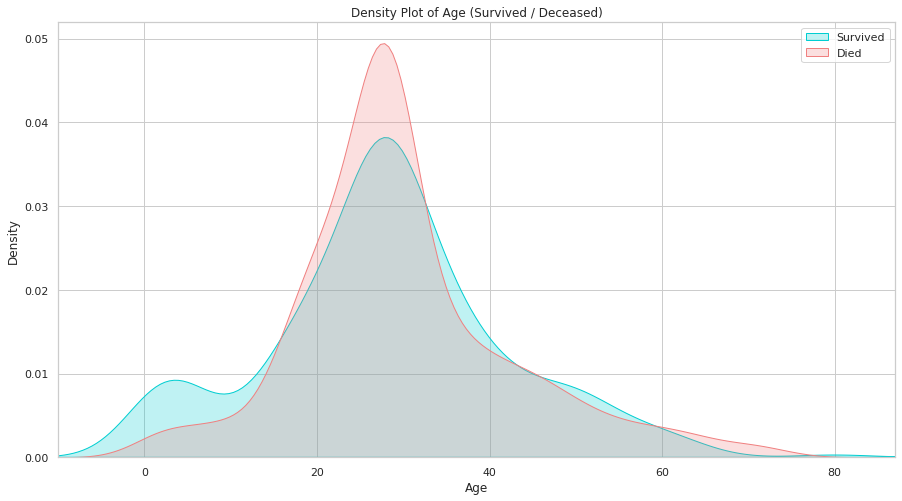

In [28]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(training['Age'][training.Survived == 1], color = "darkturquoise",shade = True)
sns.kdeplot(training["Age"][training.Survived == 0],color = "lightcoral",shade = True)
plt.legend(["Survived","Died"])
plt.title("Density Plot of Age (Survived / Deceased)")
ax.set(xlabel="Age")
plt.xlim(-10,87)
plt.show()

In [29]:
avg_survival_byage = training[["Age","Survived"]].groupby(["Age"],as_index = False).mean()
avg_survival_byage.sample(10)

,Age,Survived
62,47.00,0.111111
3,0.83,1.000000
7,3.00,0.833333
42,32.00,0.500000
87,80.00,1.000000
31,24.00,0.500000
24,19.00,0.360000
74,58.00,0.600000
35,27.00,0.611111
50,37.00,0.166667


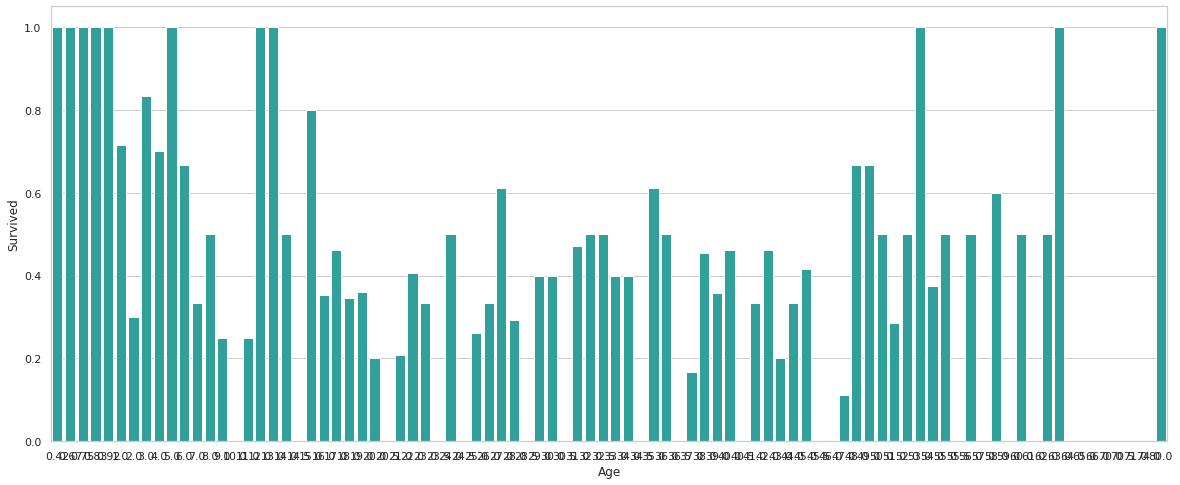

In [30]:
plt.figure(figsize=(20,8))
g = sns.barplot(x = "Age",y = "Survived",data = avg_survival_byage,color = "LightSeaGreen")
plt.show()

Adding a new category because of the bias

In [31]:
training["IsMinor"] = np.where(training["Age"] < 18,1,0)
testing["IsMinor"] = np.where(testing["Age"] < 18,1,0)

### 07.02. Fare

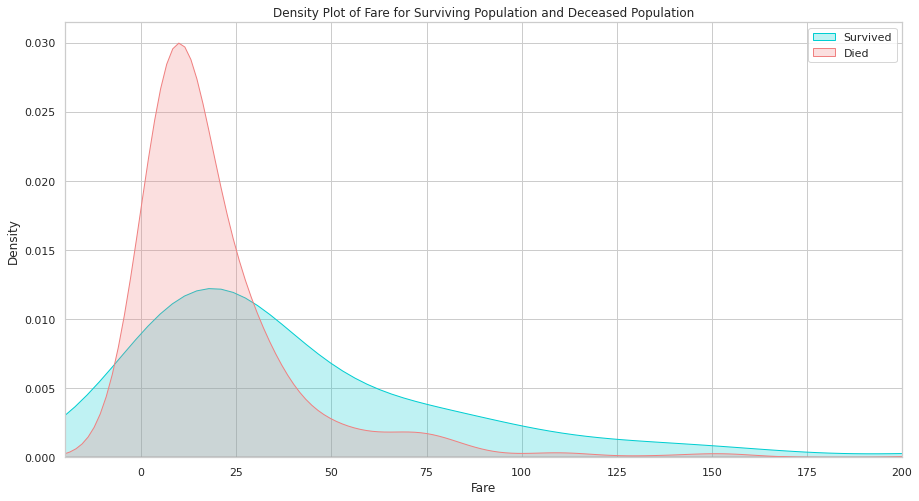

In [32]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(training["Fare"][training.Survived == 1],color = "darkturquoise",shade = True)
sns.kdeplot(training["Fare"][training.Survived == 0],color = "lightcoral",shade=True)

plt.legend(["Survived","Died"])
plt.title('Density Plot of Fare for Surviving Population and Deceased Population')
ax.set(xlabel='Fare')
plt.xlim(-20,200)
plt.show()

### 07.04. Gender

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


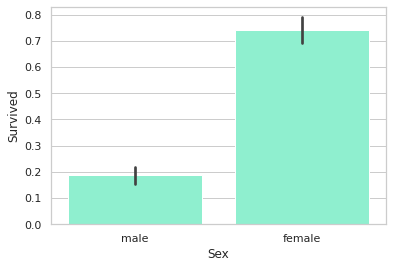

In [33]:

sns.barplot('Sex', 'Survived', data=train_data, color="aquamarine")
plt.show()


## 08. Feature Selection

### 08.01. Recursive Feature Selection Cross Validation

In [36]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression

In [39]:
training.columns.values

array(['Survived', 'Age', 'Fare', 'TravelAlone', 'Pclass_2', 'Pclass_3',
       'Embarked_Q', 'Embarked_S', 'Sex_male', 'IsMinor'], dtype=object)

In [50]:
cols = ['Age', 'Fare', 'TravelAlone', 'Pclass_2', 'Pclass_3','Embarked_Q', 'Embarked_S', 'Sex_male', 'IsMinor']
X = training[cols]
y = training['Survived']

In [46]:
rfecv = RFECV(estimator=LogisticRegression(max_iter=1000), step=1, cv=10, scoring='accuracy')
rfecv.fit(X,y)

RFECV(cv=10, estimator=LogisticRegression(max_iter=1000), scoring='accuracy')

In [51]:
print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(X.columns[rfecv.support_]))

Optimal number of features: 8
Selected features: ['Age', 'TravelAlone', 'Pclass_2', 'Pclass_3', 'Embarked_Q', 'Embarked_S', 'Sex_male', 'IsMinor']


In [56]:
rfecv.cv_results_['mean_test_score']

array([0.78672909, 0.78672909, 0.79570537, 0.79347066, 0.79684145,
       0.79686642, 0.79799001, 0.8013608 , 0.80024969])

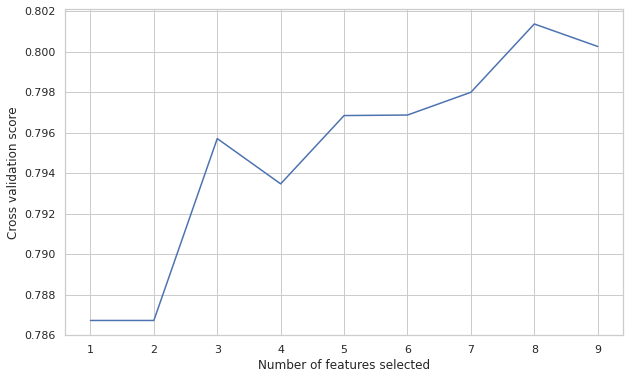

In [57]:
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score")
plt.plot(range(1,len(rfecv.cv_results_['mean_test_score']) + 1),rfecv.cv_results_['mean_test_score'])
plt.show()

### 08.02. Correlation

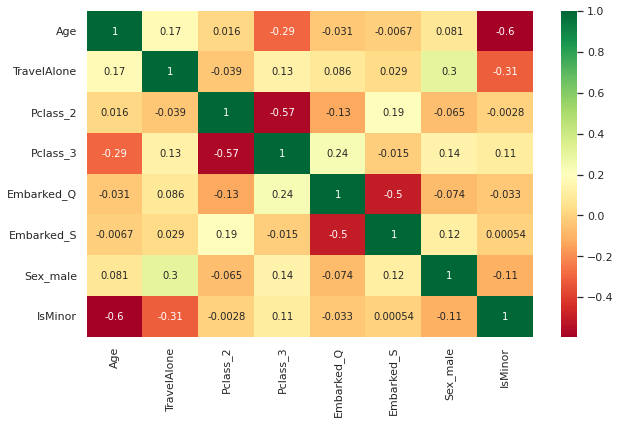

In [58]:
features =  ['Age', 'TravelAlone', 'Pclass_2', 'Pclass_3','Embarked_Q', 'Embarked_S', 'Sex_male', 'IsMinor']
X = training[features]
plt.figure(figsize=(10,6))
sns.heatmap(X.corr(), annot=True, cmap="RdYlGn")
plt.show()

## 09. Training and Evaluation

### 09.01. Train/ Test Split aprroach

In [65]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score,recall_score
from sklearn.metrics import confusion_matrix,precision_recall_curve, roc_curve,auc,log_loss


X = training[features]
y = training["Survived"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 2)

In [68]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [74]:
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:,1]
[fpr,tpr,thr] = roc_curve(y_test,y_pred_proba)

In [ ]:
## TRAIN/TEST results

In [75]:
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

LogisticRegression accuracy is 0.788
LogisticRegression log_loss is 0.505
LogisticRegression auc is 0.837


In [82]:
idx = np.min(np.where(tpr > 0.95)) 
# index of the first threshold for which the sensibility > 0.95

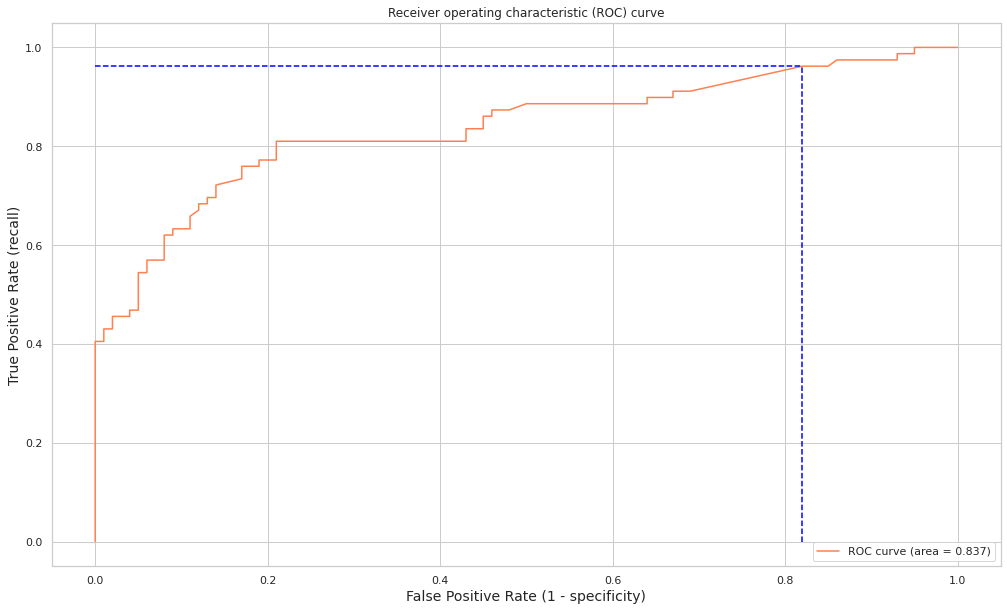

In [85]:
plt.figure(figsize= (17,10))
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

In [86]:
print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))


Using a threshold of 0.068 guarantees a sensitivity of 0.962 and a specificity of 0.180, i.e. a false positive rate of 82.00%.
